In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scanpy as sc


In [12]:
dataset = 'Human_DLPFC'
samples = ['151507', '151508', '151509', '151510', '151669', '151670', '151671', '151672', '151673', '151674', '151675', '151676']
top_x_percent = 10

/home/nuwaisir/miniconda3/envs/scribble_seg/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_23586/2946493481.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  p['max_value'] = p.max(axis=1)
/home/nuwaisir/miniconda3/envs/scribble_seg/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_23586/2946493481.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling th

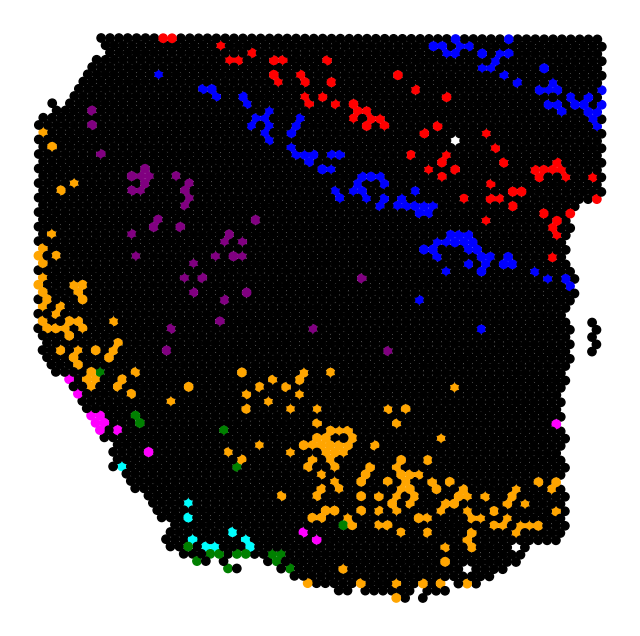

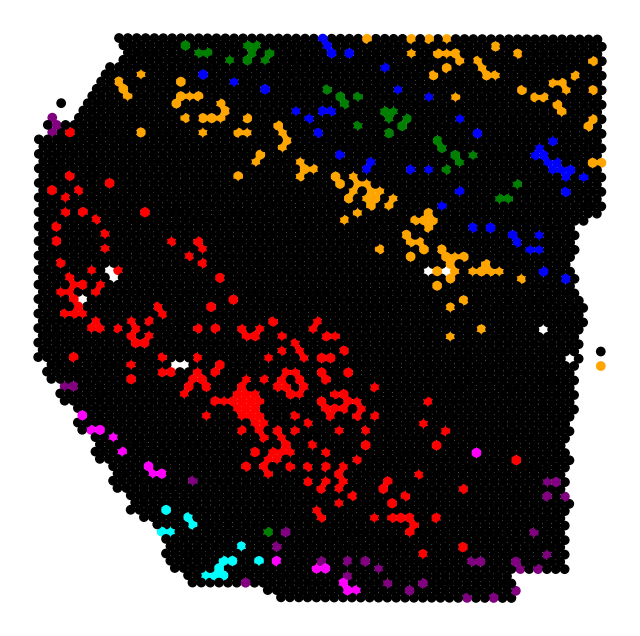

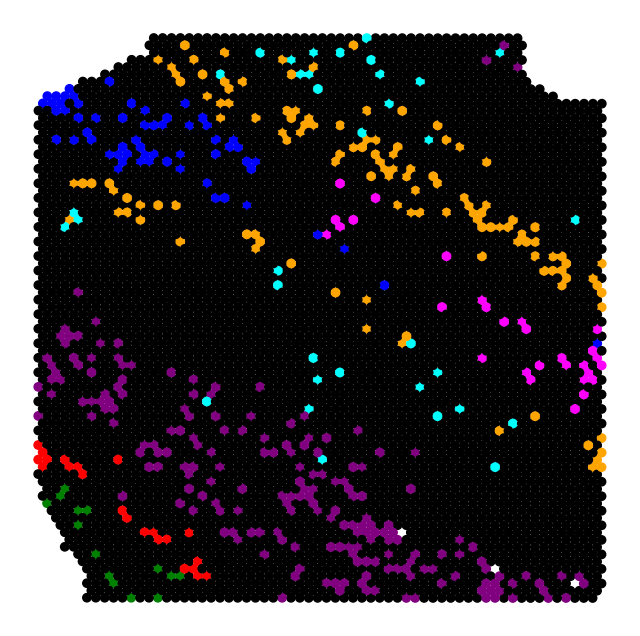

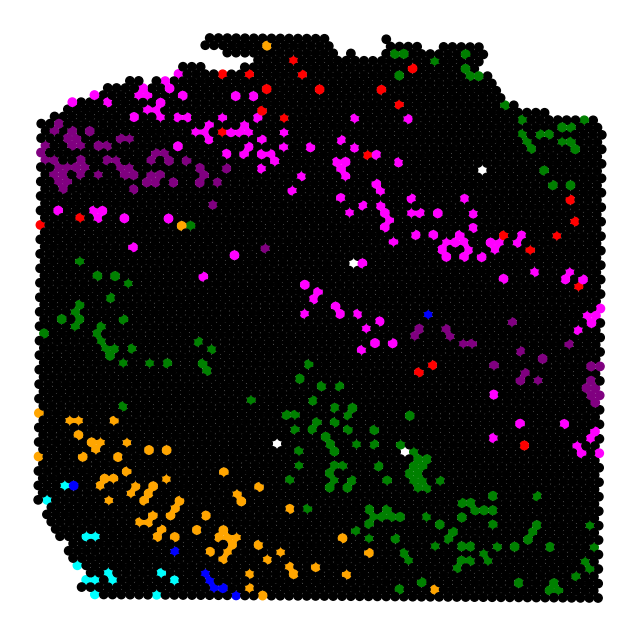

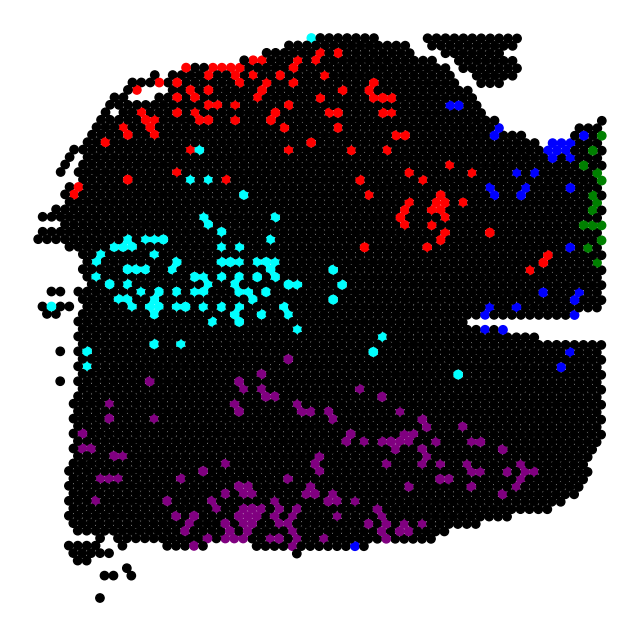

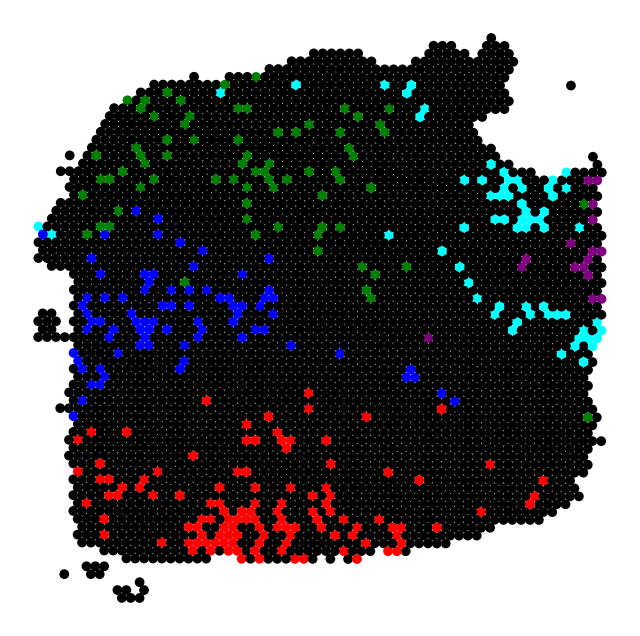

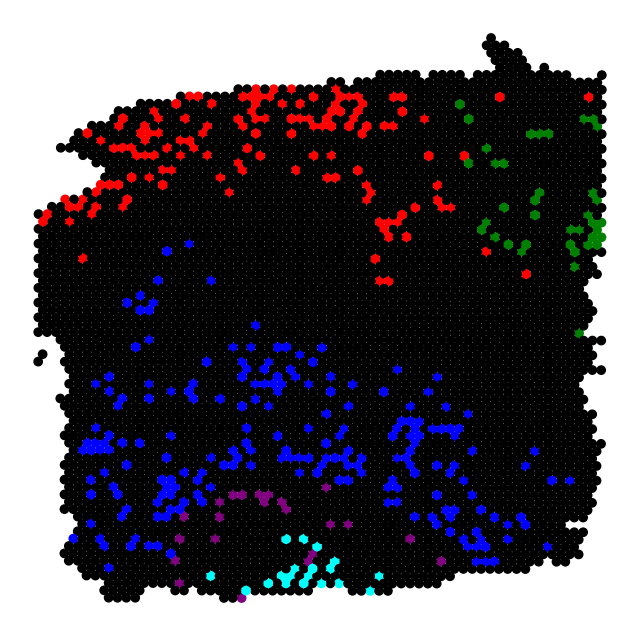

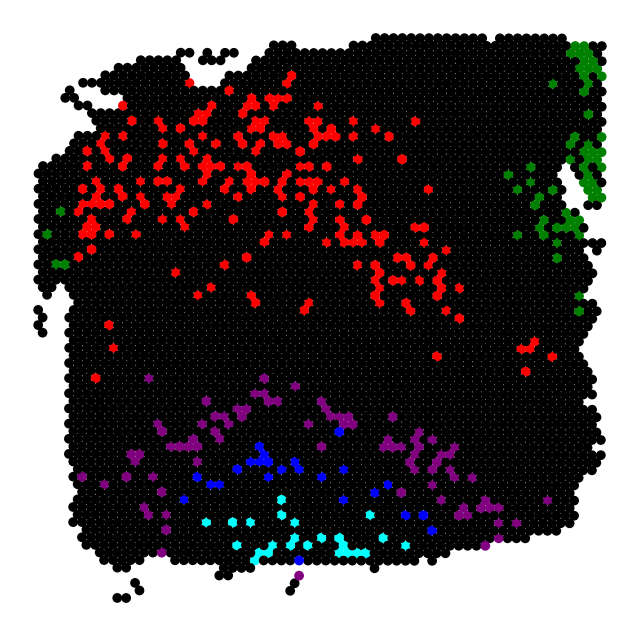

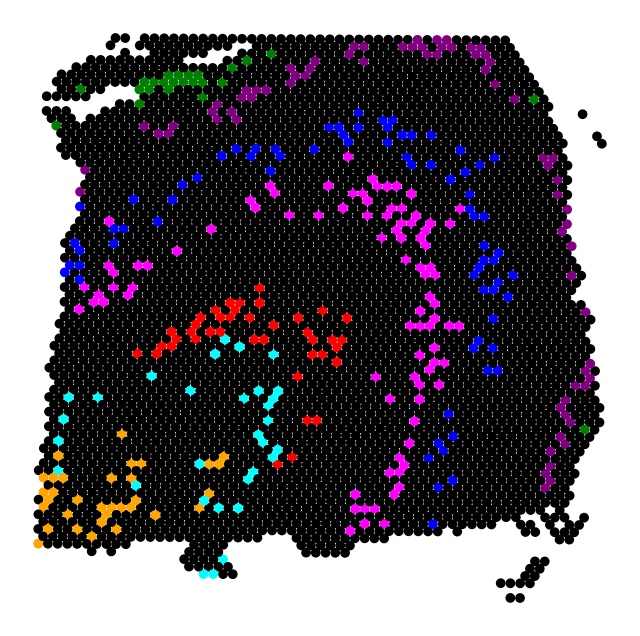

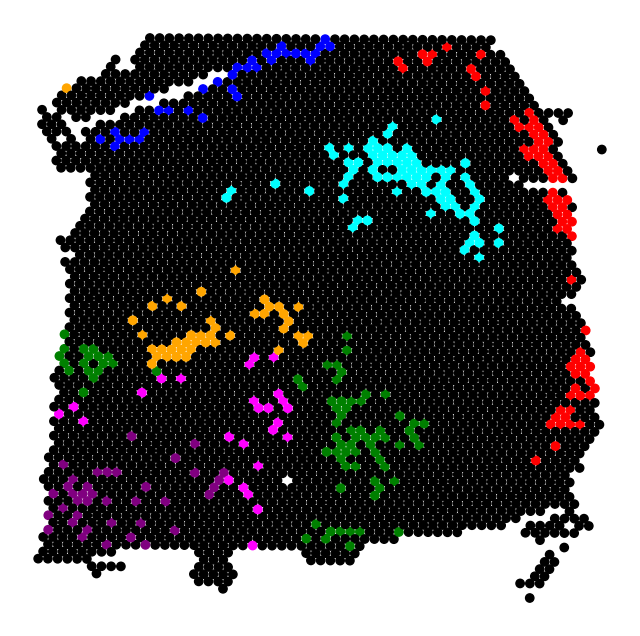

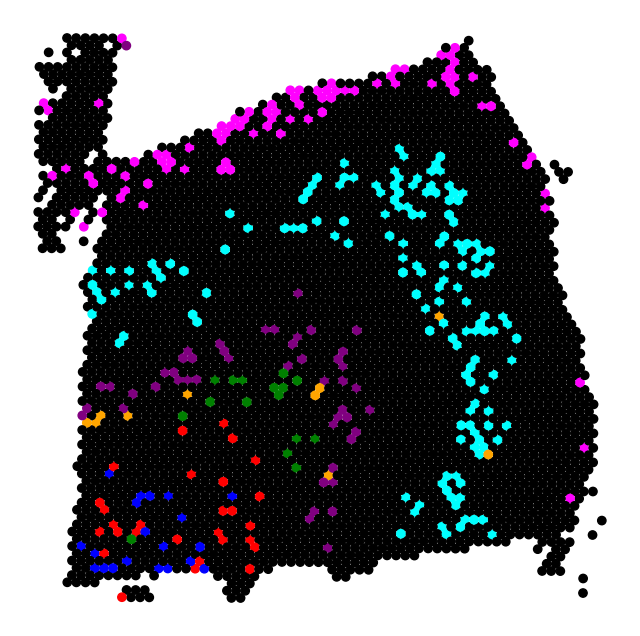

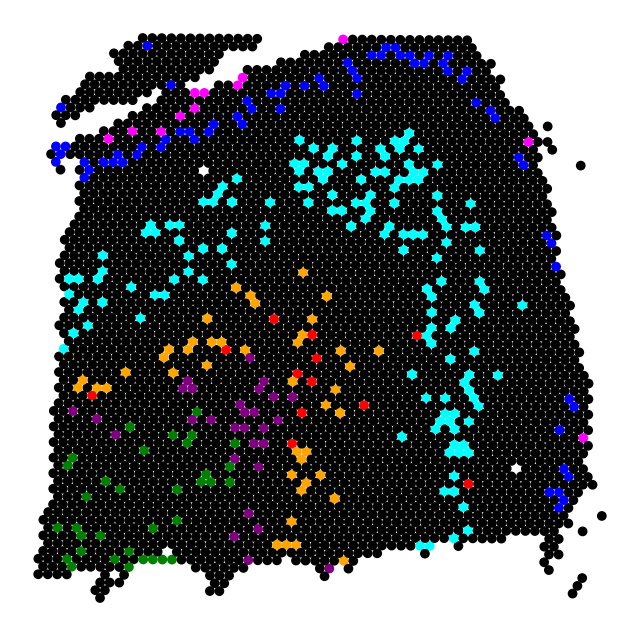

In [15]:
for sample in samples:
    df_manual_annoatation = pd.read_csv(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/Human_DLPFC/{sample}/manual_annotations.csv', index_col=0)
    unique_elem = np.unique(df_manual_annoatation['label'].values)
    cluster_count = len([x for x in unique_elem if not math.isnan(x)])

    probability_path = f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/{dataset}/{sample}/Mclust_stuffs/probabilities_model_EEE_pcs_15_cluster_{cluster_count}.csv'

    p = pd.read_csv(probability_path, index_col=0)

    # p.index
    # x_pixels = []
    # y_pixels = []

    # for spot in p.index:
    #     y_pixels.append(int(spot.split('x')[1]))
    #     x_pixels.append(int(spot.split('x')[0]))
    # p_threshold = 0.9999

    adata = sc.read_visium(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/{dataset}/{sample}/reading_h5', count_file=f'{sample}_filtered_feature_bc_matrix.h5')

    def get_labels(p_threshold):
        labels = []
        for row in p.values:
            if row.max() > p_threshold:
                labels.append(row.argmax())
            else:
                labels.append(-1)
        labels = np.array(labels)
        return labels
    p['max_column'] = p.idxmax(axis=1)
    p['max_value'] = p.max(axis=1)

    labels = np.array(['0', '1', '2', '3', '4', '5', '6', '7'])

    index_to_scribble_label = {}
    for label in labels:
        df_sub = p[p['max_column'] == label]
        indices = df_sub['max_value'].nlargest(int(len(df_sub) * top_x_percent / 100)).index
        for idx in indices:
            index_to_scribble_label[idx] = label
    # index_to_scribble_label

    color_map = {
        -1: 'black',
        0: 'red',
        1: 'blue',
        2: 'green',
        3: 'purple',
        4: 'cyan',
        5: 'orange',
        6: 'magenta',
        7: 'yellow',
    }
    all_idx_to_label = {}
    for idx in p.index:
        all_idx_to_label[idx] = -1
        if idx in index_to_scribble_label:
            all_idx_to_label[idx] = index_to_scribble_label[idx]

    np.unique(np.array(list(all_idx_to_label.values())))
    df_idx_to_label = pd.DataFrame(list(all_idx_to_label.values()), index=[list(all_idx_to_label.keys())], columns=['cluster.init'])
    df_idx_to_label['cluster.init'] = df_idx_to_label['cluster.init'].replace(-1, '')
    df_idx_to_label.to_csv(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/{dataset}/{sample}/mclust_scribble_{top_x_percent}_percent.csv')
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.scatter(adata.obsm['spatial'][:, 0], -adata.obsm['spatial'][:, 1], c=list(map(lambda x: color_map[int(x)], list(all_idx_to_label.values()))))

In [45]:
# coor = pd.read_csv('/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/Human_DLPFC/151673/Coordinates/coordinates.csv', index_col=0)
# coor
/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/Human_DLPFC/151507/Mclust_stuffs/probabilites_model_EEE_pcs_15_cluster_7.csv
/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/DLPFC/151507/Mclust_stuffs/probabilites_model_EEE_pcs_15_cluster_7.csv

In [46]:
p = pd.read_csv(probability_path, index_col=0)

In [47]:
p.index

Index(['7x15', '7x16', '7x17', '7x18', '8x13', '8x14', '8x15', '8x16', '8x17',
       '8x18',
       ...
       '26x22', '26x23', '27x14', '27x15', '27x17', '27x18', '27x19', '27x20',
       '27x21', '27x22'],
      dtype='object', length=293)

In [48]:
# x_pixels = coor['imagecol']
# y_pixels = coor['imagerow']

In [49]:
x_pixels = []
y_pixels = []

for spot in p.index:
    y_pixels.append(int(spot.split('x')[1]))
    x_pixels.append(int(spot.split('x')[0]))


# Scheme 1

In [50]:
p_threshold = 0.9999

In [51]:
def get_labels(p_threshold):
    labels = []
    for row in p.values:
        if row.max() > p_threshold:
            labels.append(row.argmax())
        else:
            labels.append(-1)
    labels = np.array(labels)
    return labels

In [52]:
p

,0,1,2,3
7x15,9.872700e-01,1.051739e-05,1.271951e-02,5.170249e-10
7x16,7.082015e-01,2.845112e-01,7.257849e-03,2.953344e-05
7x17,2.104882e-02,9.780449e-01,8.474996e-04,5.873756e-05
7x18,7.268915e-02,1.597049e-02,9.113403e-01,9.761025e-08
8x13,9.724526e-01,2.748845e-02,5.822180e-05,7.745247e-07
...,...,...,...,...
27x18,1.870881e-04,9.997675e-01,4.511700e-05,2.462686e-07
27x19,3.431350e-01,6.548468e-01,2.009230e-03,9.034954e-06
27x20,1.056429e-06,9.999858e-01,1.014597e-10,1.314537e-05
27x21,1.068734e-06,8.495715e-01,1.810352e-12,1.504274e-01


In [53]:
p['max_column'] = p.idxmax(axis=1)
p['max_value'] = p.max(axis=1)
p

/tmp/ipykernel_8939/701299070.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  p['max_value'] = p.max(axis=1)


,0,1,2,3,max_column,max_value
7x15,9.872700e-01,1.051739e-05,1.271951e-02,5.170249e-10,0,0.987270
7x16,7.082015e-01,2.845112e-01,7.257849e-03,2.953344e-05,0,0.708201
7x17,2.104882e-02,9.780449e-01,8.474996e-04,5.873756e-05,1,0.978045
7x18,7.268915e-02,1.597049e-02,9.113403e-01,9.761025e-08,2,0.911340
8x13,9.724526e-01,2.748845e-02,5.822180e-05,7.745247e-07,0,0.972453
...,...,...,...,...,...,...
27x18,1.870881e-04,9.997675e-01,4.511700e-05,2.462686e-07,1,0.999768
27x19,3.431350e-01,6.548468e-01,2.009230e-03,9.034954e-06,1,0.654847
27x20,1.056429e-06,9.999858e-01,1.014597e-10,1.314537e-05,1,0.999986
27x21,1.068734e-06,8.495715e-01,1.810352e-12,1.504274e-01,1,0.849572


In [54]:
labels = np.array(['0', '1', '2', '3', '4', '5', '6', '7'])

index_to_scribble_label = {}
for label in labels:
    df_sub = p[p['max_column'] == label]
    indices = df_sub['max_value'].nlargest(int(len(df_sub) * top_x_percent / 100)).index
    for idx in indices:
        index_to_scribble_label[idx] = label
index_to_scribble_label

{'8x14': '0',
 '9x16': '0',
 '9x15': '0',
 '12x16': '0',
 '26x18': '1',
 '26x20': '1',
 '26x12': '1',
 '19x28': '1',
 '25x18': '1',
 '26x15': '1',
 '19x26': '1',
 '21x17': '1',
 '10x18': '1',
 '23x18': '1',
 '22x16': '1',
 '19x19': '1',
 '19x9': '2',
 '19x8': '2',
 '20x7': '2',
 '19x10': '2',
 '23x9': '2',
 '20x9': '2',
 '21x8': '2',
 '23x10': '2',
 '22x9': '2',
 '25x9': '3',
 '19x21': '3',
 '23x25': '3'}

In [55]:
color_map = {
    -1: 'black',
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'purple',
    4: 'cyan',
    5: 'orange',
    6: 'magenta',
    7: 'yellow',
}


In [56]:
all_idx_to_label = {}
for idx in p.index:
    all_idx_to_label[idx] = -1
    if idx in index_to_scribble_label:
        all_idx_to_label[idx] = index_to_scribble_label[idx]

In [57]:
np.unique(np.array(list(all_idx_to_label.values())))

array(['-1', '0', '1', '2', '3'], dtype='<U21')

In [58]:
df_idx_to_label = pd.DataFrame(list(all_idx_to_label.values()), index=[list(all_idx_to_label.keys())], columns=['cluster.init'])
df_idx_to_label['cluster.init'] = df_idx_to_label['cluster.init'].replace(-1, '')

In [59]:
df_idx_to_label.to_csv(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/others/Melanoma/mclust_scribble_{top_x_percent}_percent.csv')

In [61]:
np.unique(df_idx_to_label['cluster.init'].values)

array(['', '0', '1', '2', '3'], dtype=object)

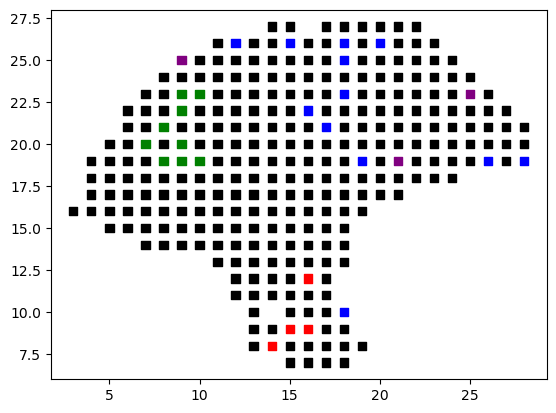

In [62]:
# plt.figure(figsize=(8, 8))
plt.scatter(y_pixels, x_pixels, marker='s', c=list(map(lambda x: color_map[int(x)], list(all_idx_to_label.values()))))

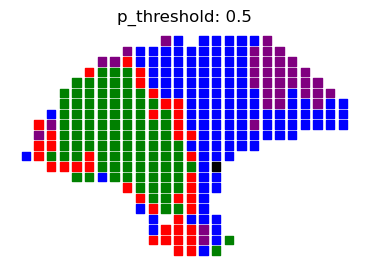

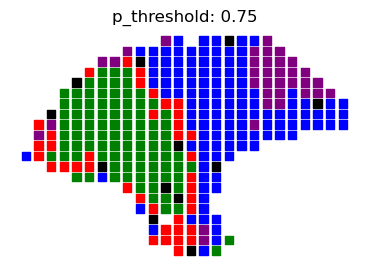

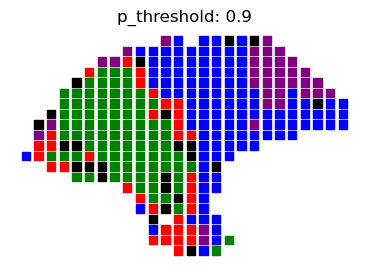

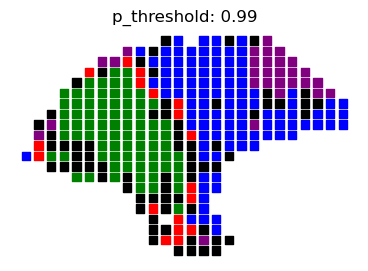

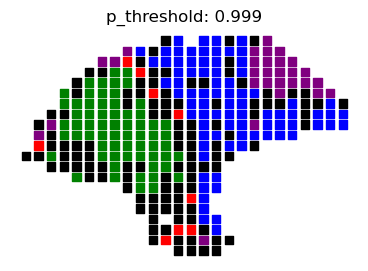

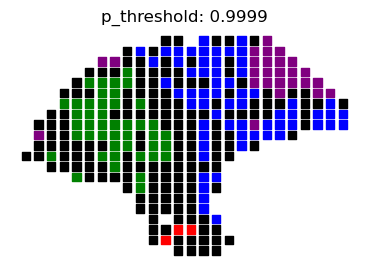

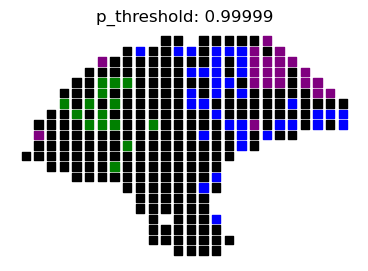

In [24]:
p_thresholds = [0.5, 0.75, 0.9, 0.99, 0.999, 0.9999, 0.99999]
for p_threshold in p_thresholds:
    labels = get_labels(p_threshold)
    plt.figure(figsize = (4.5, 3))
    plt.axis('off')
    plt.title(f"p_threshold: {p_threshold}")
    plt.scatter(y_pixels, x_pixels, c=list(map(lambda x: color_map[x], labels)), marker='s')

# Scheme 2

In [25]:
p

,0,1,2,3
7x15,9.872700e-01,1.051739e-05,1.271951e-02,5.170249e-10
7x16,7.082015e-01,2.845112e-01,7.257849e-03,2.953344e-05
7x17,2.104882e-02,9.780449e-01,8.474996e-04,5.873756e-05
7x18,7.268915e-02,1.597049e-02,9.113403e-01,9.761025e-08
8x13,9.724526e-01,2.748845e-02,5.822180e-05,7.745247e-07
...,...,...,...,...
27x18,1.870881e-04,9.997675e-01,4.511700e-05,2.462686e-07
27x19,3.431350e-01,6.548468e-01,2.009230e-03,9.034954e-06
27x20,1.056429e-06,9.999858e-01,1.014597e-10,1.314537e-05
27x21,1.068734e-06,8.495715e-01,1.810352e-12,1.504274e-01


In [26]:
ratios = []
for row in p.values:
    first_max = row.max()
    second_max = np.partition(row, -2)[-2]
    ratio = first_max / second_max
    ratios.append(ratio)
ratios = np.array(ratios)

In [27]:
v = np.array([1, 2, 4, 1, 2, 8])
np.partition(v, -2)[-2]

4

In [28]:
ratio_threshold = 20

In [29]:
def get_labels(ratio_threshold):
    labels_2 = []
    for i, row in enumerate(p.values):
        if ratios[i] > ratio_threshold:
            labels_2.append(row.argmax())
        else:
            labels_2.append(-1)
    labels_2 = np.array(labels_2)
    return labels_2

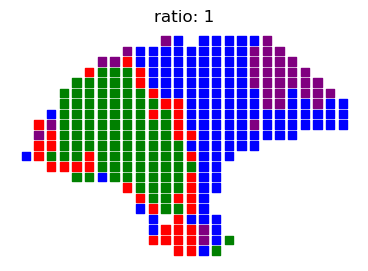

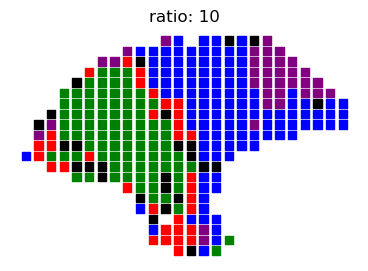

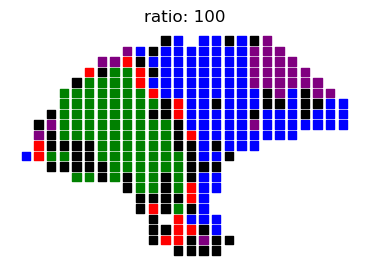

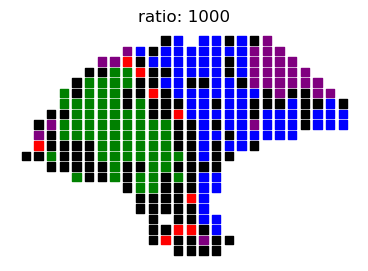

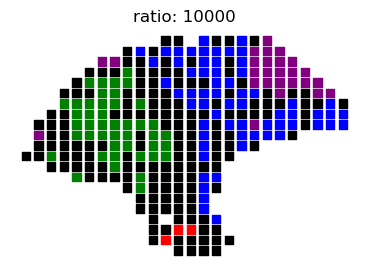

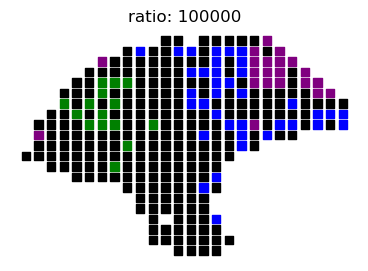

In [30]:
ratio_thresholds = [1, 10, 100, 1000, 10000, 100000]
for ratio_threshold in ratio_thresholds:
    labels = get_labels(ratio_threshold)
    plt.figure(figsize = (4.5, 3))
    plt.axis('off')
    plt.title(f'ratio: {ratio_threshold}')
    plt.scatter(y_pixels, x_pixels, c=list(map(lambda x: color_map[x], labels)), marker='s')